# Gradient Descent

### 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

In [9]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
np.random.seed(42)
X = np.random.rand(1000, 2) #Create an array of the given shape (1000, 2) and populate it with random samples from a uniform distribution over [0, 1)
error = np.random.normal(loc=0, scale=1, size=1000) 
y = 3 * X[:,0] + 5 * X[:,1] + 3 + error
y = y.reshape(y.size,-1)

X = np.c_[np.ones(1000), X] #c_ concatenates 
X


(1000, 1)

### 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and simulate 500 epochs of batch gradient descent. Plot the resulting $\vec{\theta}$ values for every 5th epoch. (*)

In [57]:
def gradient_descent(X, y, iterations, learning_rate = .1):

    m = len(X)

    theta = np.random.randn(X.shape[1], 1) #Random number from normal distribution with dimensions 3, 1. Theta is initialised to this value. 

    for _ in range(iterations):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient

    return theta

In [61]:
theta = gradient_descent(X, y, 500)
theta.reshape(-1)

array([3.12125637, 2.95358024, 4.83223806])

In [70]:
def theta_values_for_diff_iterations(X, y, learning_rate, max_iterations, step):
    
    theta_values_for_diff_iterations = []

    for iteration in range(1, max_iterations, step):
        theta_values = gradient_descent(X, y, iteration, learning_rate)
        theta_values = [theta_value for theta_value in theta_values.reshape(-1)]
        theta_values_for_diff_iterations.append(theta_values)
    
    return theta_values_for_diff_iterations

In [71]:
theta_values_500 = theta_values_for_diff_iterations(X=X, y=y, learning_rate=.1, max_iterations=500, step=5)

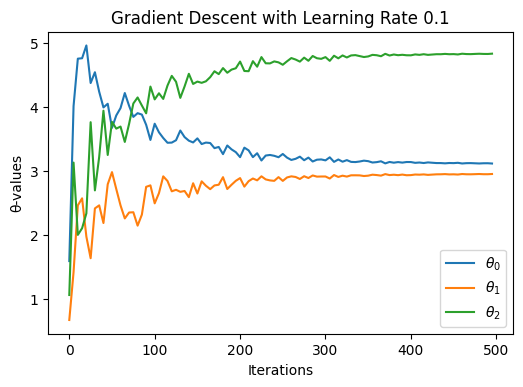

In [72]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(0, 500, 5), theta_values_500)
_ = ax.set(title="Gradient Descent with Learning Rate 0.1", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

b) Do the same as for a) but with learning rate  𝜂=0.01 , 5000 epochs and plot every 20 step. What do you notice when changing the learning rate? (*)

In [73]:
theta_values_5000 = theta_values_for_diff_iterations(X=X, y=y, learning_rate=.01, max_iterations=5000, step=20)

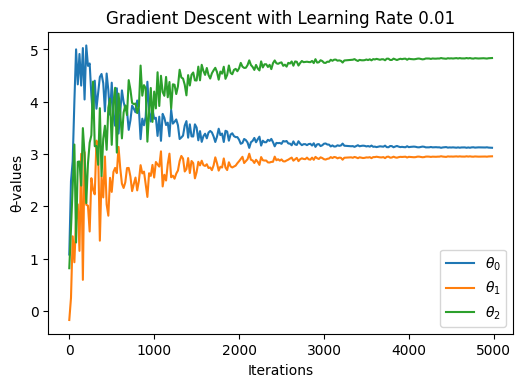

In [74]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(0, 5000, 20), theta_values_5000)
_ = ax.set(title="Gradient Descent with Learning Rate 0.01", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

### 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

In [75]:
def stochastic_gradient_descent(X, y, epochs):

    t0, t1 = 5, 50 #Learning schedule parameters. Scales the learning rate (we do not want it to take the same steps every time, it should take smaller steps at the end)

    def learning_rate_schedule(t):
        """Decrease learning rate as training progresses"""
        return t0 / (t + t1) #It will be a smaller number as t increases

    theta = np.random.randn(X.shape[1], 1)

    m = len(X)

    for epoch in range(epochs):
        for i in range(m): #As many samples as the length
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index+1] #We pick out a random sample
            y_i = y[random_index:random_index+1]
            gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            eta = learning_rate_schedule(epoch * m + i)
            theta -= eta * gradients

    return theta

In [78]:
def theta_values_for_diff_iterations_stoch(X, y, max_epochs, step):
    
    theta_values_for_diff_iterations = []

    for epoch in range(1, max_epochs, step):
        theta_values = stochastic_gradient_descent(X, y, epoch)
        theta_values = [theta_value for theta_value in theta_values.reshape(-1)]
        theta_values_for_diff_iterations.append(theta_values)
    
    return theta_values_for_diff_iterations

In [77]:
theta_stoch_grad_500 = stochastic_gradient_descent(X, y, epochs=500)
theta_stoch_grad_500

array([[3.13431414],
       [2.94797278],
       [4.82076116]])

In [79]:
theta_values_stoch_grad_500 = theta_values_for_diff_iterations_stoch(X=X, y=y, max_epochs=500, step=5)

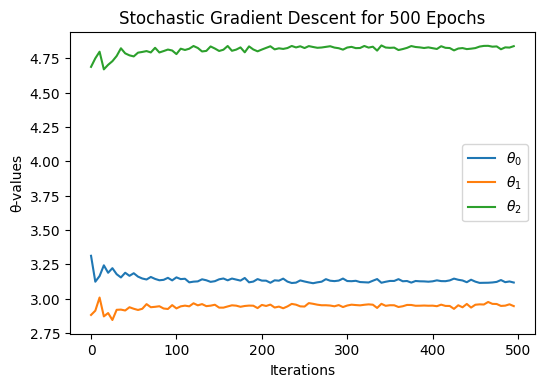

In [80]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(0, 500, 5), theta_values_stoch_grad_500)
_ = ax.set(title="Stochastic Gradient Descent for 500 Epochs", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

In [81]:
theta_stoch_grad_5000 = stochastic_gradient_descent(X, y, epochs=5000)
theta_stoch_grad_5000

array([[3.11745747],
       [2.95737048],
       [4.83706774]])

### 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

In [223]:
theta, error = gradientDescent(X, y, batch_size=100)
theta

array([[4.36537015],
       [2.45124212],
       [2.8920796 ]])

In [213]:
def mini_batch_gradient_descent(X, y, no_batches, batch_size, learning_rate = .1,):
    
    mini_batches_X = []
    mini_batches_y = []
    
    temp_X = pd.DataFrame(X)
    temp_y = pd.DataFrame(y)

    #where every data point belongs to one and only one mini-batch.


    def cost(X, y, theta):
        h = hypothesis(X, theta)
        J = np.dot((h - y).transpose(), (h - y))
        J /= 2
        return J[0]

    for _ in range(no_batches):
        batch_X = temp_X.sample(n=batch_size)
        batch_y = temp_y.iloc[batch_X.index]
        mini_batches_X.append(np.array(batch_X))
        mini_batches_y.append(np.array(batch_y))

    theta = np.random.randn(X.shape[1], 1) #Random number from normal distribution with dimensions 3, 1. Theta is initialised to this value. 

    gradient=0

    theta = np.zeros((X.shape[1], 1))
    
    error_list = []
    max_iters = 3

    for itr in range(max_iters):

        for mini_batch_x, mini_batch_y in zip(mini_batches_X, mini_batches_y):
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))

    return theta, error_list


    """for mini_batch_x, mini_batch_y in zip(mini_batches_X, mini_batches_y):
        
        for i in range(no_batches):
            
            gradient += 2 / len(mini_batch_x) * mini_batch_x.T @ (mini_batch_x @ theta - mini_batch_y)

            theta -= learning_rate * gradient
        
        theta -= learning_rate * gradient / len(mini_batch_x)

    return theta"""